In [1]:
import seaborn as sns
import numpy as np 
import pickle
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
game_amount = 100000
# tsetlin_filename, ranges, self_can_bet_index = "/home/jaoi/master22/pet_for_sale/winning_games_db/{}_tsetlined_games.pkl".format(game_amount), 19, 17
tsetlin_filename, ranges, self_can_bet_index = "/home/jaoi/master22/pet_for_sale/winning_games_db/4PPO_{}_tsetlined_games.pkl".format(game_amount), 17, 21
with open(tsetlin_filename, "rb") as fp:
        games = pickle.load(fp)

In [3]:
ys = Counter()
for game in games:
    ys[game[1]] += 1
ys

Counter({7: 26207,
         0: 254711,
         5: 38703,
         8: 47483,
         4: 103646,
         6: 68049,
         2: 69894,
         3: 44887,
         11: 9206,
         10: 20507,
         9: 17464,
         12: 4025,
         13: 1287,
         14: 201,
         1: 811,
         15: 20,
         16: 3})

In [4]:
bets = list(range(ranges))
votes = np.array([ys[bet] for bet in bets])
bets_nz = bets[1:]
votes_nz = votes[1:]
len(bets_nz)
len(votes_nz)

16

In [5]:
# self_can_bet_index = 21


where_can = []
for i, game in enumerate(games):
    if game[0][self_can_bet_index] == 1:
        where_can.append(i)
indexes = np.array(where_can)
games_can_bid = games[indexes]

In [6]:
yc = Counter()
for game in games_can_bid:
    yc[game[1]] += 1

bets_c = list(range(ranges))
votes_c = np.array([yc[bet] for bet in bets])    
yc.most_common()

[(0, 209657),
 (4, 103646),
 (2, 69894),
 (6, 68049),
 (8, 47483),
 (3, 44887),
 (5, 38703),
 (7, 26207),
 (10, 20507),
 (9, 17464),
 (11, 9206),
 (12, 4025),
 (13, 1287),
 (1, 811),
 (14, 201),
 (15, 20),
 (16, 3)]

In [7]:
def remove_duplicate_pairs(games):
    new_games = []
    for i,game in enumerate(games):
        int_arr = game[0].astype(int)
        complete_arr = np.append(int_arr, game[1])
        new_games.append(complete_arr)

    new_games = np.array(new_games)
    
    x = np.random.rand(new_games.shape[1])
    y = new_games.dot(x)
    unique, index = np.unique(y, return_index=True)
    unique_xy = new_games[index]
    
    unique_pairs = []
    for game in unique_xy:
        last, rest = game[-1], game[:-1]
        unique_pairs.append(np.array((rest.astype(np.float32), last), dtype=object))
    return np.array(unique_pairs)
unique_pairs = remove_duplicate_pairs(games_can_bid)


In [8]:
ysu = Counter()
for game in unique_pairs:
    ysu[game[1]] += 1
ysu.most_common()

[(0, 134296),
 (4, 79133),
 (6, 55871),
 (2, 43489),
 (3, 38945),
 (8, 34897),
 (5, 27761),
 (7, 19703),
 (10, 13970),
 (9, 12721),
 (11, 5188),
 (12, 3549),
 (13, 1258),
 (1, 788),
 (14, 199),
 (15, 20),
 (16, 3)]

In [9]:
bets_r = list(range(ranges))
votes_r = np.array([ysu[bet] for bet in bets])

In [10]:
need_of_oversample = [tup for tup in ysu.most_common() if tup[1] < 2000]

def oversample(info_tup, desired_amount, source_games):
    bob = []
    for game in source_games:
        if game[1] == info_tup[0]:
            bob.append(game)
    indexes = np.random.randint(0, info_tup[1], desired_amount - info_tup[1])
    temp = []
    for ind in indexes:
        temp.append(bob[ind])
    return np.array(temp)

unique_oversample = np.copy(unique_pairs)
temp = []
for overnd in need_of_oversample:
    temp.extend(oversample(overnd, 2000, unique_pairs))
unique_oversample = np.concatenate((unique_oversample, np.array(temp)), axis=0)

In [11]:
uo = Counter()
for game in unique_oversample:
    uo[game[1]] += 1
uo

Counter({0: 134296,
         2: 43489,
         3: 38945,
         4: 79133,
         1: 2000,
         6: 55871,
         5: 27761,
         10: 13970,
         7: 19703,
         8: 34897,
         9: 12721,
         11: 5188,
         12: 3549,
         13: 2000,
         14: 2000,
         15: 2000,
         16: 2000})

In [12]:
bets_o = list(range(ranges))
votes_o = np.array([uo[bet] for bet in bets])

raw


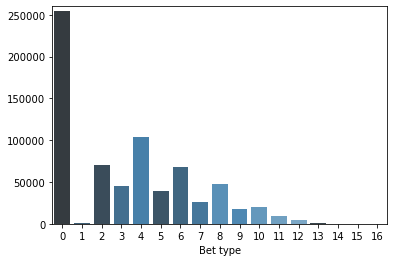

can_bid


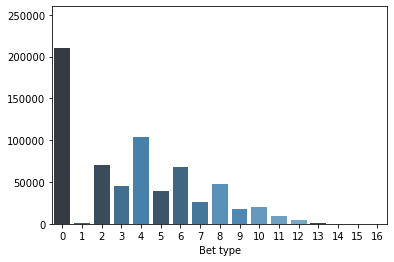

remove duplicates


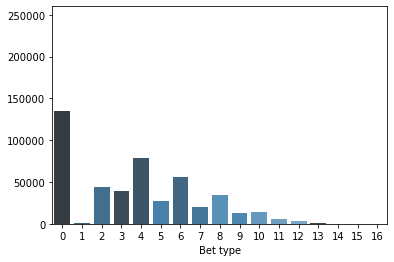

oversample


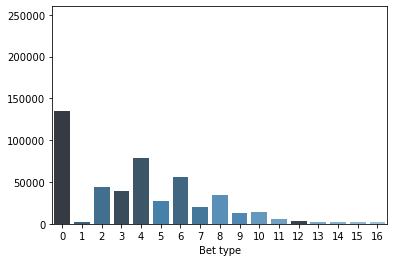

In [13]:
def visualize_y_distribution(classes, frequency, name=False):
    
    bets_n_votes = list(zip(classes, frequency))
    bets_n_votes.sort(reverse=True, key=lambda x:x[1])
    pal = sns.color_palette("Blues_d", len(bets_n_votes) + 1)
    bet_rank = [tup[0] for tup in bets_n_votes]
    ax = sns.barplot(x=classes, y=frequency, palette=np.array(pal[::-1])[bet_rank])
    ax.set(ylim=(0, 260000))
    ax.set_xlabel("Bet type")
    # ax.set_ylabel("Bet amount")
    
    if name:
        plt.savefig(name)
        plt.show()
        
    else:
        plt.show()

print("raw")
visualize_y_distribution(bets, votes, "plots/PPO4r_rawscale_raw")
print("can_bid")
visualize_y_distribution(bets_c, votes_c, "plots/PPO4r_rawscale_canbid")
print("remove duplicates")
visualize_y_distribution(bets_r, votes_r, "plots/PPO4r_rawscale_remdupes")
print("oversample")
visualize_y_distribution(bets_o, votes_o, "plots/PPO4r_rawscale_oversample")


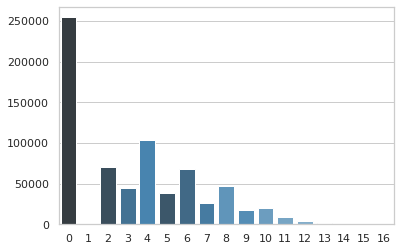

In [14]:
sns.set_theme(style="whitegrid")
bets_n_votes = list(zip(bets, votes))
bets_n_votes.sort(reverse=True, key=lambda x:x[1])
pal = sns.color_palette("Blues_d", len(bets_n_votes))

bet_rank = [tup[0] for tup in bets_n_votes]
ax = sns.barplot(x=bets, y=votes, palette=np.array(pal[::-1])[bet_rank])



# np.array(pal[::-1])[rank].shape


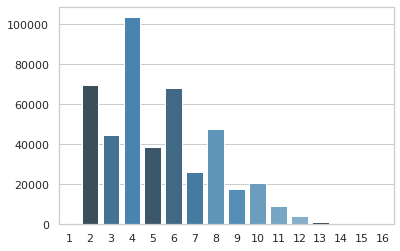

In [15]:

bets_n_votes_nz = list(zip(bets_nz, votes_nz))
bets_n_votes_nz.sort(reverse=True, key=lambda x:x[1])
pal_nz = sns.color_palette("Blues_d", len(bets_n_votes_nz))

bet_rank_nz = [tup[0] for tup in bets_n_votes_nz]
ax = sns.barplot(x=bets_nz, y=votes_nz, palette=np.array(pal[::-1])[bet_rank_nz])

